<a href="https://colab.research.google.com/github/devyadav11/DA6401_ASSIGNMENT_1/blob/main/DA6401__Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: ee23m074 (devyadav11) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


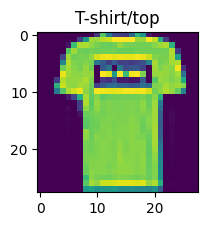

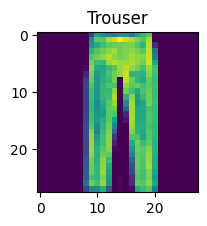

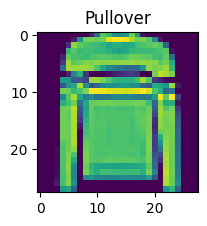

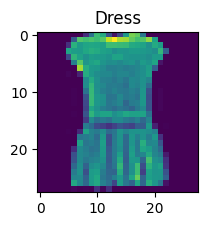

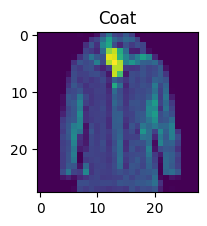

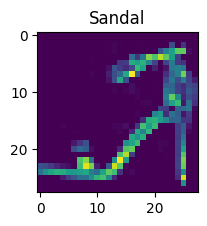

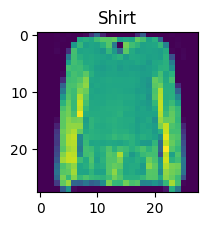

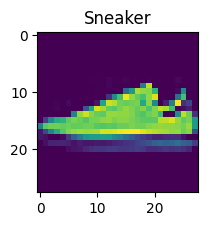

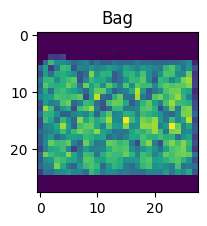

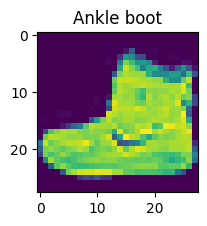

In [1]:
# Question-1


import wandb
from keras.datasets import fashion_mnist

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
#import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math


wandb.init(project = "DA6401_ASSIGNMENT_1_newdata", entity="devyadav11")   #  initialize a Weights & Biases (WandB) run

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()   # loading data


type_class = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


image_list = []
class_list = []

for i in range(10):
  class_y = np.argmax(y_train == i)
  image = x_train[class_y,:,:]
  plt.figure(figsize=[12,5])
  plt.subplot( 2, 5, i+1)
  plt.title(type_class[i])
  plt.imshow(image)
  image_list.append(image)
  class_list.append(type_class[i])



wandb.log({"Question 1": [wandb.Image(img, caption=caption) for img, caption in zip(image_list, type_class)]})








In [2]:
## Question-2:


import wandb
from keras.datasets import fashion_mnist
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

np.random.seed(42)


#Activation functions
def relu(x):
  return np.maximum(0, x)

def sigmoid(x):
  clip_x = np.clip(x, -500, 500)  # Clipping x to avoid overflow
  return 1 / (1 + np.exp(-clip_x))

def tanh(x):
  clip_x = np.clip(x, -500, 500)  # Clipping x for uniformity
  return np.tanh(clip_x)

def identity(x):
  return x




class neural_network():
  def __init__(self, layers, learning_rate, dataset, weightDecay, batch_size, epochs, optimiser,
               activationFunc, beta = 0.1, beta_RMS = 0.9, isWandb = True):


    if dataset == "fashion_mnist":
      (X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

    elif dataset == "mnist":
      (X_train, Y_train), (X_test, Y_test) = mnist.load_data()

    X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)


    X_train = X_train.reshape(-1, 28*28) / 255.0
    X_test = X_test.reshape(-1, 28*28) / 255.0
    X_val = X_val.reshape(-1, 28*28) / 255.0












    self.x_train = X_train
    self.y_train = Y_train
    self.x_val = X_val
    self.y_val = Y_val
    self.x_test = X_test
    self.y_test = Y_test






    self.epochs = epochs
    self.layers = layers                     # number of neurons and hidden layers (instance variable)
    self.beta = 0.1
    self.beta_RMS = 0.9
    self.beta1 = 0.9
    self.beta2 = 0.999
    self.epsilon = 1e-9
    self.optimiser = optimiser
    self.activationFunc = activationFunc
    self.weightDecay = weightDecay

    self.batch_size = batch_size
    self.learning_rate = learning_rate


    # Initialize isWandb to False by default
    self.isWandb = isWandb


    self.weights = []
    self.bias = []


    for i in range(1, len(layers)):
      weight = np.random.randn(layers[i], layers[i-1])
      self.weights.append(weight)
      bias = np.random.randn(layers[i], 1)
      self.bias.append(bias)


  def softmax(self, x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

  def loss(self, y_pred):                                        # here y
    return -np.log(y_pred)


  def one_hot_encodeing(self, y_true):
    one_hot = np.eye(10)[y_true]
    return one_hot




  def forward_prop(self, x, W, b):
      x = x.reshape(-1,1)
      self.hidden_layer_h = []
      self.hidden_layer_a = []


      for i in range(len(self.layers) - 2):
        h = 0
        a = np.dot(W[i], x) + b[i]
        if self.activationFunc == "sigmoid":
          h = sigmoid(a)
        elif self.activationFunc == "tanh":
          h = tanh(a)
        elif self.activationFunc == "relu":
          h = relu(a)
        #h =  self.sigmoid(a)
        x = h

        self.hidden_layer_h.append(h)
        self.hidden_layer_a.append(a)

      #for i in range(len(self.hidden_layer_a)):
        #print(f"hidden layers h{i} =  {self.hidden_layer_a[i]}")
        #print(f"hidden layers a{i} =  {self.hidden_layer_h[i]}")

      output_layer = np.dot(W[-1], self.hidden_layer_h[-1]) + b[-1]
      output = self.softmax(output_layer)


      return output






## here input x, y

  def backword_prop(self, x , y, W, b):
    x_input = x.reshape(-1,1)

    dW = []
    db = []

    y_output = self.forward_prop(x = x, W = W, b = b)
    #print(self.y_output)

    y_pred = np.dot((y_output).T, self.one_hot_encodeing(y))     # y_pred is predicated value of output y corrosponding to true class


    dh_out = -(1/(y_pred + self.epsilon))*self.one_hot_encodeing(y)
    da_out = -(self.one_hot_encodeing(y) - (y_output).T)
    dh_out = dh_out.reshape(-1, 1)                                           # gradiant of loss with respect to output activation layer (h)
    da_out = da_out.T
    self.da_stored = []                                                      # gradiant of loss with respect to output preactivation layer (a)


    for i in reversed(range(len(W))):
      if i == 0:
         pass
      else:

       dw = np.dot(da_out, self.hidden_layer_h[i-1].T)
       dW.append(dw)
       db_temp = np.sum(da_out, axis=1, keepdims=True)
       db.append(db_temp)

       dh = np.dot((W[i]).T, da_out)
       if self.activationFunc == "sigmoid":
        dg = self.hidden_layer_h[i-1] * (1 - self.hidden_layer_h[i-1])
       elif self.activationFunc == "tanh":
        dg = (1 + self.hidden_layer_h[i-1]) * (1 - self.hidden_layer_h[i-1])
       elif self.activationFunc == "relu":
         dg = np.where(self.hidden_layer_a[i-1] > 0, 1, 0)


       da = dh*dg
       self.da_stored.append(da)


       da_out = da

    dw = np.dot(da_out, x_input.T)
    dW.append(dw)
    db1 = np.sum(da_out, axis=1, keepdims=True)
    db.append(db1)

    dW.reverse()
    self.da_stored.reverse()
    db.reverse()




    return dW, db


  def accuracyLoss(self, x, y, W, b):
    correct = 0
    loss = 0
    for i in range(1, len(self.layers)):
      loss += (self.weightDecay / 2) * np.linalg.norm(W[i-1]) ** 2
    for i in range(len(x)):
      x_input = x[i].reshape(-1,1)
      y_true = y[i]
      y_output = self.forward_prop(x = x_input, W = W, b = b)
      y_pred_class = np.argmax(y_output)
      if y_pred_class == y_true:
        correct += 1
      y_pred = np.dot((y_output).T, self.one_hot_encodeing(y_true))
      loss += self.loss(y_pred + 1e-9)                                 #1e-9 is addeded bcuz in case if ypred = 0 then function doesnt blow up!!


    return correct*100/len(x), loss/len(x)












  def SGD(self):

    W, b = self.weights, self.bias
    iteration = 0

    for epoch in range(self.epochs):
      print(f'epoch {epoch + 1}/{self.epochs}')



      indices = np.arange(len(self.x_train))
      np.random.shuffle(indices)

      x_train_shuffle = self.x_train[indices]
      y_train_shuffle = self.y_train[indices]

      for i in range(0, len(x_train_shuffle), self.batch_size):
        x_batch = x_train_shuffle[i:i + self.batch_size]
        y_batch = y_train_shuffle[i:i + self.batch_size]

        # Initilise dw and db
        dW = [np.zeros_like(w) for w in W]
        db = [np.zeros_like(b_i) for b_i in b]

        for j in range(len(x_batch)):

          output = self.forward_prop(x_batch[j], W, b)
          dW_inter, db_inter = self.backword_prop(y = y_batch[j], x = x_batch[j], W = W, b = b)

          for i in range(len(W)):
            dW[i] += dW_inter[i]
            db[i] += db_inter[i]

       # Final dW and db
        dW = [dw / len(x_batch) for dw in dW]
        db = [db_i / len(x_batch) for db_i in db]

        du_W = self.beta

       #calculating W, b for 1 batch
        for i in range(len(W)):
          W[i] -= self.learning_rate * (dW[i])
          b[i] -= self.learning_rate * (db[i])

      # acccuracy and loss calculated after each epoch
      acuu, loss = self.accuracyLoss(W = W, b = b, x = self.x_train, y = self.y_train)
      v_acc, v_loss = self.accuracyLoss(W=  W, b = b, x = self.x_val, y = self.y_val)

      if self.isWandb == True:
        wandb.log({'accuracy': acuu})
        wandb.log({'loss': loss})
        wandb.log({'v_accuracy': v_acc})
        wandb.log({'v_loss': v_loss})
        wandb.log({'epoch': iteration})
      print(f" accuracy = {acuu}, Loss = {loss}, Validation_accuracy =  {v_acc}, Validation_loss =  {v_loss}")
      iteration += 1


    # True W, b after training

    return W, b




  def Momentam_GD(self):
    W, b = self.weights, self.bias
    iteration = 0
    du_W = [np.zeros_like(w) for w in self.weights]
    du_b = [np.zeros_like(b_i) for b_i in self.bias]

    for epoch in range(self.epochs):
      print(f'epoch {epoch + 1}/{self.epochs}')



      indices = np.arange(len(self.x_train))
      np.random.shuffle(indices)

      x_train_shuffle = self.x_train[indices]
      y_train_shuffle = self.y_train[indices]

      for i in range(0, len(x_train_shuffle), self.batch_size):
        x_batch = x_train_shuffle[i:i + self.batch_size]
        y_batch = y_train_shuffle[i:i + self.batch_size]

        # Initilise dw and db
        dW = [np.zeros_like(w) for w in W]
        db = [np.zeros_like(b_i) for b_i in b]

        for j in range(len(x_batch)):

          output = self.forward_prop(x_batch[j], W, b)
          dW_inter, db_inter = self.backword_prop(y = y_batch[j], x = x_batch[j], W = W, b = b)

          for i in range(len(W)):
            dW[i] += dW_inter[i]
            db[i] += db_inter[i]

       # average dw and db in one batch
        dW = [dw / len(x_batch) for dw in dW]
        db = [db_i / len(x_batch) for db_i in db]

        for i in range(len(W)):
          du_W[i] = self.beta*du_W[i] + dW[i]
          du_b[i] = self.beta*du_b[i] + db[i]




       #calculating W, b for 1 batch
        for i in range(len(W)):
          W[i] -= self.learning_rate * (du_W[i])
          b[i] -= self.learning_rate * (du_b[i])



      # acccuracy and loss calculated after each epoch
      acuu, loss = self.accuracyLoss(W = W, b = b, x = self.x_train, y = self.y_train)
      v_acc, v_loss = self.accuracyLoss(W=  W, b = b, x = self.x_val, y = self.y_val)

      if self.isWandb == True:
        wandb.log({'accuracy': acuu})
        wandb.log({'loss': loss})
        wandb.log({'v_accuracy': v_acc})
        wandb.log({'v_loss': v_loss})
        wandb.log({'epoch': iteration})
      print(f" accuracy = {acuu}, Loss = {loss}, Validation_accuracy =  {v_acc}, Validation_loss =  {v_loss}")
      iteration += 1


    # True W, b after training

    return W, b









  def Nestrov_Based_GD(self):
    W, b = self.weights, self.bias
    W_lookAhead, b_lookAhead = self.weights, self.bias
    iteration = 0
    du_W = [np.zeros_like(w) for w in self.weights]
    du_b = [np.zeros_like(b_i) for b_i in self.bias]

    for epoch in range(self.epochs):
      print(f'epoch {epoch + 1}/{self.epochs}')



      indices = np.arange(len(self.x_train))
      np.random.shuffle(indices)

      x_train_shuffle = self.x_train[indices]
      y_train_shuffle = self.y_train[indices]

      for i in range(0, len(x_train_shuffle), self.batch_size):
        x_batch = x_train_shuffle[i:i + self.batch_size]
        y_batch = y_train_shuffle[i:i + self.batch_size]

        # Initilise dw and db
        dW_lookAhead = [np.zeros_like(w) for w in W]
        db_lookAhead = [np.zeros_like(b_i) for b_i in b]

        for j in range(len(x_batch)):

          output = self.forward_prop(x_batch[j], W, b)
          dW_inter, db_inter = self.backword_prop(y = y_batch[j], x = x_batch[j], W = W_lookAhead, b = b_lookAhead)

          for i in range(len(W)):
            dW_lookAhead[i] += dW_inter[i]
            db_lookAhead[i] += db_inter[i]

       # average dw and db in one batch
        dW_lookAhead = [dw / len(x_batch) for dw in dW_lookAhead]
        db_lookAhead = [db_i / len(x_batch) for db_i in db_lookAhead]

        for i in range(len(W)):
          du_W[i] = self.beta*du_W[i] + dW_lookAhead[i]
          du_b[i] = self.beta*du_b[i] + db_lookAhead[i]




       #calculating W, b for 1 batch
        for i in range(len(W)):
          W[i] -= self.learning_rate * (du_W[i])
          b[i] -= self.learning_rate * (du_b[i])

        for i in range(len(W)):
          W_lookAhead[i] = W[i] - self.beta*dW_lookAhead[i]
          b_lookAhead[i] = b[i] - self.beta*db_lookAhead[i]



      # acccuracy and loss calculated after each epoch
      acuu, loss = self.accuracyLoss(W = W, b = b, x = self.x_train, y = self.y_train)
      v_acc, v_loss = self.accuracyLoss(W=  W, b = b, x = self.x_val, y = self.y_val)

      if self.isWandb == True:
        wandb.log({'accuracy': acuu})
        wandb.log({'loss': loss})
        wandb.log({'v_accuracy': v_acc})
        wandb.log({'v_loss': v_loss})
        wandb.log({'epoch': iteration})
      print(f" accuracy = {acuu}, Loss = {loss}, Validation_accuracy =  {v_acc}, Validation_loss =  {v_loss}")
      iteration += 1


    # True W, b after training

    return W, b






  def RMS_prop(self):
    W, b = self.weights, self.bias
    iteration = 0
    dv_W = [np.zeros_like(w) for w in self.weights]
    dv_b = [np.zeros_like(b_i) for b_i in self.bias]

    for epoch in range(self.epochs):
      print(f'epoch {epoch + 1}/{self.epochs}')



      indices = np.arange(len(self.x_train))
      np.random.shuffle(indices)

      x_train_shuffle = self.x_train[indices]
      y_train_shuffle = self.y_train[indices]

      for i in range(0, len(x_train_shuffle), self.batch_size):
        x_batch = x_train_shuffle[i:i + self.batch_size]
        y_batch = y_train_shuffle[i:i + self.batch_size]

        # Initilise dw and db
        dW = [np.zeros_like(w) for w in W]
        db = [np.zeros_like(b_i) for b_i in b]

        for j in range(len(x_batch)):

          output = self.forward_prop(x_batch[j], W, b)
          dW_inter, db_inter = self.backword_prop(y = y_batch[j], x = x_batch[j], W = W, b = b)

          for i in range(len(W)):
            dW[i] += dW_inter[i]
            db[i] += db_inter[i]

       # average dw and db in one batch
        dW = [dw / len(x_batch) for dw in dW]
        db = [db_i / len(x_batch) for db_i in db]

        for i in range(len(W)):
          dv_W[i] = self.beta_RMS*dv_W[i] + (1-self.beta_RMS)*(dW[i])**2
          dv_b[i] = self.beta_RMS*dv_b[i] + (1-self.beta_RMS)*(db[i])**2




       #calculating W, b for 1 batch
        for i in range(len(W)):
          W[i] -= self.learning_rate/np.sqrt(dv_W[i] + self.epsilon) * dW[i]
          b[i] -= self.learning_rate/np.sqrt(dv_b[i] + self.epsilon) * db[i]



      # acccuracy and loss calculated after each epoch
      acuu, loss = self.accuracyLoss(W = W, b = b, x = self.x_train, y = self.y_train)
      v_acc, v_loss = self.accuracyLoss(W=  W, b = b, x = self.x_val, y = self.y_val)

      if self.isWandb == True:
        wandb.log({'accuracy': acuu})
        wandb.log({'loss': loss})
        wandb.log({'v_accuracy': v_acc})
        wandb.log({'v_loss': v_loss})
        wandb.log({'epoch': iteration})
      print(f" accuracy = {acuu}, Loss = {loss}, Validation_accuracy =  {v_acc}, Validation_loss =  {v_loss}")
      iteration += 1


    # True W, b after training

    return W, b





  def ADAM(self):
    W, b = self.weights, self.bias
    iteration = 0
    t = 1
    dv_W = [np.zeros_like(w) for w in self.weights]
    dv_b = [np.zeros_like(b_i) for b_i in self.bias]
    dm_W = [np.zeros_like(w) for w in self.weights]
    dm_b = [np.zeros_like(b_i) for b_i in self.bias]
    m_hat_W = [np.zeros_like(w) for w in self.weights]
    m_hat_b = [np.zeros_like(b_i) for b_i in self.bias]
    v_hat_W = [np.zeros_like(w) for w in self.weights]
    v_hat_b = [np.zeros_like(b_i) for b_i in self.bias]

    for epoch in range(self.epochs):
      print(f'epoch {epoch + 1}/{self.epochs}')



      indices = np.arange(len(self.x_train))
      np.random.shuffle(indices)

      x_train_shuffle = self.x_train[indices]
      y_train_shuffle = self.y_train[indices]

      for i in range(0, len(x_train_shuffle), self.batch_size):
        x_batch = x_train_shuffle[i:i + self.batch_size]
        y_batch = y_train_shuffle[i:i + self.batch_size]

        # Initilise dw and db
        dW = [np.zeros_like(w) for w in W]
        db = [np.zeros_like(b_i) for b_i in b]

        for j in range(len(x_batch)):

          output = self.forward_prop(x_batch[j], W, b)
          dW_inter, db_inter = self.backword_prop(y = y_batch[j], x = x_batch[j], W = W, b = b)

          for i in range(len(W)):
            dW[i] += dW_inter[i]
            db[i] += db_inter[i]

       # average dw and db in one batch
        dW = [dw / len(x_batch) for dw in dW]
        db = [db_i / len(x_batch) for db_i in db]

        for i in range(len(W)):
          dv_W[i] = self.beta2*dv_W[i] + (1-self.beta2)*(dW[i])**2
          dv_b[i] = self.beta2*dv_b[i] + (1-self.beta2)*(db[i])**2

          v_hat_W[i] = dv_W[i]/(1 - self.beta2**t)
          v_hat_b[i] = dv_b[i]/(1 - self.beta2**t)


        for i in range(len(W)):
          dm_W[i] = self.beta1*dm_W[i] + (1-self.beta1)*dW[i]
          dm_b[i] = self.beta1*dm_b[i] + (1-self.beta1)*db[i]

          m_hat_W[i] = dm_W[i]/(1 - self.beta1**t)
          m_hat_b[i] = dm_b[i]/(1 - self.beta1**t)




       #calculating W, b for 1 batch
        for i in range(len(W)):
          W[i] -= self.learning_rate/np.sqrt(v_hat_W[i] + self.epsilon) * m_hat_W[i]
          b[i] -= self.learning_rate/np.sqrt(v_hat_b[i] + self.epsilon) * m_hat_b[i]





        t += 1
      # acccuracy and loss calculated after each epoch
      acuu, loss = self.accuracyLoss(W = W, b = b, x = self.x_train, y = self.y_train)
      v_acc, v_loss = self.accuracyLoss(W =  W, b = b, x = self.x_val, y = self.y_val)

      if self.isWandb == True:
        wandb.log({'accuracy': acuu})
        wandb.log({'loss': loss})
        wandb.log({'v_accuracy': v_acc})
        wandb.log({'v_loss': v_loss})
        wandb.log({'epoch': iteration})
      print(f" accuracy = {acuu}, Loss = {loss}, Validation_accuracy =  {v_acc}, Validation_loss =  {v_loss}")
      iteration += 1


    # True W, b after training

    return W, b











  def optimseWeights(self):
    if self.optimiser == "sgd":
      self.SGD()
    if self.optimiser == "momentum":
      self.Momentam_GD()
    if self.optimiser == "nag":
      self.Nestrov_Based_GD()
    if self.optimiser == "rmsprop":
      self.RMS_prop()
    if self.optimiser == "adam":
      self.ADAM()





#predict the output of input data

  def predict(self, x):

    if self.optimiser == "sgd":
      W, b = self.SGD()
    if self.optimiser == "momentum":
      W, b = self.Momentam_GD()
    if self.optimiser == "nag":
      W, b = self.Nestrov_Based_GD()
    if self.optimiser == "rmsprop":
      W, b = self.RMS_prop()
    if self.optimiser == "adam":
      W, b = self.ADAM()
    Prediction = []
    for i in range(len(x)):
      y_output = self.forward_prop(x[i], W, b)
      y_pred = np.argmax(y_output)
      Prediction.append(y_pred)
    return Prediction





  def confusionMatrix(self):
    predictions = self.predict(self.x_test)

    class_names = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

    if self.isWandb == True:
      conf_matrix = confusion_matrix(self.y_test, predictions)
      plt.figure(figsize=(10, 7))
      sns_heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                                xticklabels=class_names, yticklabels=class_names)
      plt.title('Confusion Matrix')
      plt.ylabel('True Label')
      plt.xlabel('Predicted Label')

      # Save the plot to an image file
      heatmap_image_filename = "confusion_matrix_heatmap.png"
      plt.savefig(heatmap_image_filename)
      plt.close()  # Close the plot to avoid displaying it in the notebook/output

      # Log the image to Wandb
      wandb.log({"confusion_matrix_custom": wandb.Image(heatmap_image_filename)})

    else:
      conf_matrix = confusion_matrix(self.y_test, predictions)
      plt.figure(figsize=(10, 7))
      sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                  xticklabels= class_names,
                  yticklabels= class_names)
      plt.title('Confusion Matrix')
      plt.ylabel('True Label')
      plt.xlabel('Predicted Label')
      plt.show()















































epoch 1/10
 accuracy = 78.09814814814816, Loss = [0.60224631], Validation_accuracy =  76.61666666666666, Validation_loss =  [0.64353625]
epoch 2/10
 accuracy = 81.18148148148148, Loss = [0.51426951], Validation_accuracy =  79.76666666666667, Validation_loss =  [0.56046211]
epoch 3/10
 accuracy = 83.42037037037036, Loss = [0.45567558], Validation_accuracy =  81.26666666666667, Validation_loss =  [0.50778062]
epoch 4/10
 accuracy = 84.58333333333333, Loss = [0.42096831], Validation_accuracy =  82.83333333333333, Validation_loss =  [0.47768586]
epoch 5/10
 accuracy = 85.92777777777778, Loss = [0.3848902], Validation_accuracy =  83.81666666666666, Validation_loss =  [0.45641163]
epoch 6/10
 accuracy = 86.22407407407407, Loss = [0.37102192], Validation_accuracy =  83.6, Validation_loss =  [0.45662843]
epoch 7/10
 accuracy = 86.7925925925926, Loss = [0.35664497], Validation_accuracy =  83.8, Validation_loss =  [0.44637956]
epoch 8/10
 accuracy = 87.66111111111111, Loss = [0.33639984], Valida

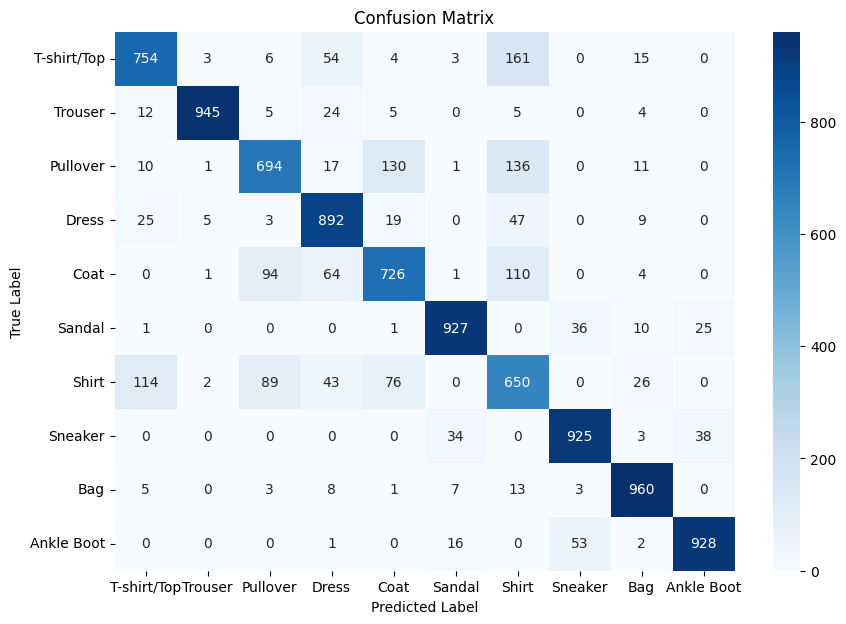

None


In [8]:
NN = neural_network(layers = [784,128,128,128,128,128,10],dataset = "mnist", learning_rate = 1e-3 ,weightDecay = 0, batch_size = 64,
                    epochs = 10, optimiser = 'adam', activationFunc = "sigmoid", beta = 0.1, beta_RMS = 0.9,isWandb = False)
print(NN.confusionMatrix())


In [14]:
NN = neural_network(layers = [784,128,256,128,10],dataset = "mnist", learning_rate = 1e-3 ,weightDecay = 0.5, batch_size = 64,
                    epochs = 10, optimiser = 'rmsprop', activationFunc = "sigmoid", beta = 0.1, beta_RMS = 0.9,isWandb = False)
NN.predict(NN.x_test)


epoch 1/10
 accuracy = 85.32777777777778, Loss = [1.2519856], Validation_accuracy =  84.9, Validation_loss =  [7.46972593]
epoch 2/10
 accuracy = 90.56296296296296, Loss = [1.08516533], Validation_accuracy =  89.45, Validation_loss =  [7.33428686]
epoch 3/10
 accuracy = 92.63518518518518, Loss = [1.01493085], Validation_accuracy =  90.88333333333334, Validation_loss =  [7.28148238]
epoch 4/10
 accuracy = 94.25555555555556, Loss = [0.96364033], Validation_accuracy =  91.5, Validation_loss =  [7.25290491]
epoch 5/10
 accuracy = 95.26296296296296, Loss = [0.93525393], Validation_accuracy =  92.51666666666667, Validation_loss =  [7.23319647]
epoch 6/10
 accuracy = 96.31111111111112, Loss = [0.90287805], Validation_accuracy =  92.96666666666667, Validation_loss =  [7.21188615]
epoch 7/10
 accuracy = 96.94074074074074, Loss = [0.883053], Validation_accuracy =  93.35, Validation_loss =  [7.21213615]
epoch 8/10
 accuracy = 97.47222222222223, Loss = [0.86483378], Validation_accuracy =  93.58333

[np.int64(7),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(4),
 np.int64(9),
 np.int64(4),
 np.int64(9),
 np.int64(0),
 np.int64(6),
 np.int64(9),
 np.int64(0),
 np.int64(1),
 np.int64(5),
 np.int64(9),
 np.int64(7),
 np.int64(3),
 np.int64(4),
 np.int64(9),
 np.int64(6),
 np.int64(6),
 np.int64(5),
 np.int64(4),
 np.int64(0),
 np.int64(7),
 np.int64(4),
 np.int64(0),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(3),
 np.int64(4),
 np.int64(7),
 np.int64(2),
 np.int64(7),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(7),
 np.int64(4),
 np.int64(2),
 np.int64(3),
 np.int64(5),
 np.int64(1),
 np.int64(2),
 np.int64(4),
 np.int64(4),
 np.int64(6),
 np.int64(3),
 np.int64(5),
 np.int64(5),
 np.int64(6),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(9),
 np.int64(5),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(3),
 np.int64(7),
 np.int64(4),
 np.int64(2),
 np.int64(4),
 np.int64(3),
 np.int64(0),
 np.int64(7),
 np.in

In [15]:
NN = neural_network(layers = [784,128,128,64,64,32,32,128,10],dataset = "mnist", learning_rate = 1e-3 ,weightDecay = 0.5, batch_size = 64,
                    epochs = 10, optimiser = 'adam', activationFunc = "sigmoid", beta = 0.1, beta_RMS = 0.9,isWandb = False)
NN.predict(NN.x_test)


epoch 1/10
 accuracy = 83.11296296296297, Loss = [1.18463771], Validation_accuracy =  82.21666666666667, Validation_loss =  [6.2773527]
epoch 2/10
 accuracy = 88.3037037037037, Loss = [1.01720127], Validation_accuracy =  86.56666666666666, Validation_loss =  [6.13837696]
epoch 3/10
 accuracy = 91.24814814814815, Loss = [0.92737618], Validation_accuracy =  89.25, Validation_loss =  [6.05746665]
epoch 4/10
 accuracy = 93.38333333333334, Loss = [0.86374467], Validation_accuracy =  90.66666666666667, Validation_loss =  [6.0051043]
epoch 5/10
 accuracy = 94.07222222222222, Loss = [0.83587108], Validation_accuracy =  91.35, Validation_loss =  [6.00262685]
epoch 6/10
 accuracy = 94.90925925925926, Loss = [0.80878041], Validation_accuracy =  92.21666666666667, Validation_loss =  [5.98928475]
epoch 7/10
 accuracy = 95.56666666666666, Loss = [0.78572381], Validation_accuracy =  92.2, Validation_loss =  [5.99028976]
epoch 8/10
 accuracy = 96.52037037037037, Loss = [0.76024798], Validation_accurac

[np.int64(7),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(4),
 np.int64(4),
 np.int64(4),
 np.int64(9),
 np.int64(0),
 np.int64(6),
 np.int64(9),
 np.int64(0),
 np.int64(1),
 np.int64(3),
 np.int64(9),
 np.int64(7),
 np.int64(3),
 np.int64(4),
 np.int64(9),
 np.int64(6),
 np.int64(6),
 np.int64(5),
 np.int64(4),
 np.int64(0),
 np.int64(7),
 np.int64(4),
 np.int64(0),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(3),
 np.int64(0),
 np.int64(7),
 np.int64(2),
 np.int64(7),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(7),
 np.int64(4),
 np.int64(2),
 np.int64(3),
 np.int64(5),
 np.int64(1),
 np.int64(2),
 np.int64(4),
 np.int64(4),
 np.int64(6),
 np.int64(3),
 np.int64(5),
 np.int64(5),
 np.int64(6),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(9),
 np.int64(5),
 np.int64(7),
 np.int64(8),
 np.int64(5),
 np.int64(2),
 np.int64(7),
 np.int64(4),
 np.int64(6),
 np.int64(4),
 np.int64(3),
 np.int64(0),
 np.int64(7),
 np.in

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
epoch 1/10
 accuracy = 88.85, Loss = [0.37504643], Validation_accuracy =  88.2, Validation_loss =  [0.39394633]
epoch 2/10
 accuracy = 91.66666666666667, Loss = [0.27846239], Validation_accuracy =  90.08333333333333, Validation_loss =  [0.33082868]
epoch 3/10
 accuracy = 94.01296296296296, Loss = [0.20763434], Validation_accuracy =  92.06666666666666, Validation_loss =  [0.27749882]
epoch 4/10
 accuracy = 95.31481481481481, Loss = [0.15912393], Validation_accuracy =  93.15, Validation_loss =  [0.24584276]
epoch 5/10
 accuracy = 96.2388888888889, Loss = [0.13001338], Validation_accuracy =  93.75, Validation_loss =  [0.22877046]
epoch 6/10
 accuracy = 95.62777777777778, Loss = [0.14347794], Validation_accuracy =  92.68333333333334, Validation_loss =  [0.25099556]
epoch 7/10
 accuracy = 97.48703703703704, Loss = [0.08931681], Validation_accuracy =  94.23333333333333, Validation_loss =  [0.212259]
epoch 8/10
 accuracy = 97.30740740740741, 

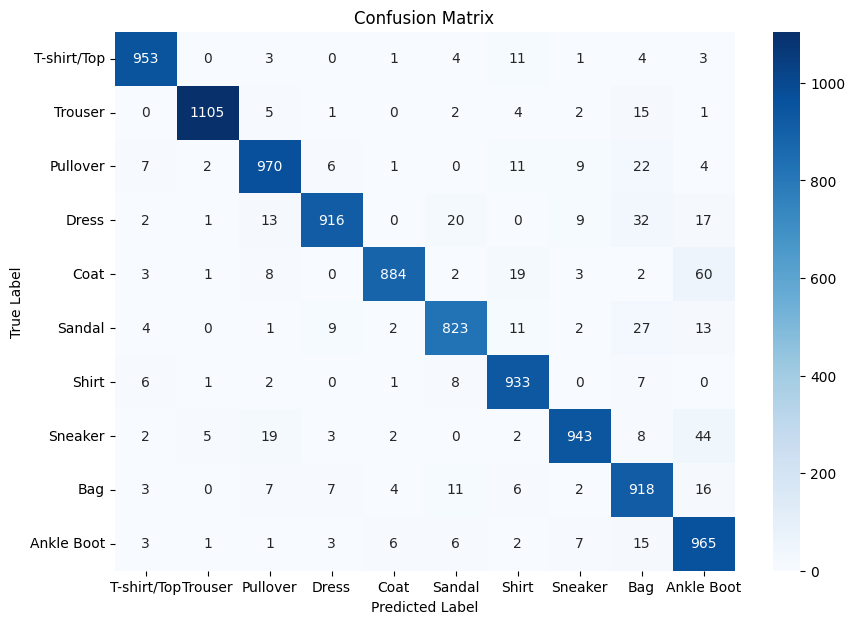

None


In [7]:
NN = neural_network(layers = [784,128,128,64,64,32,32,128,10],dataset = "mnist", learning_rate = 1e-3 ,weightDecay = 0.0005, batch_size = 16,
                    epochs = 10, optimiser = 'adam', activationFunc = "sigmoid", beta = 0.1, beta_RMS = 0.9,isWandb = True)
print(NN.confusionMatrix())


epoch 1/10
 accuracy = 81.36481481481482, Loss = [0.53953657], Validation_accuracy =  80.26666666666667, Validation_loss =  [0.61142491]
epoch 2/10
 accuracy = 82.45185185185186, Loss = [0.48721947], Validation_accuracy =  81.95, Validation_loss =  [0.5605289]
epoch 3/10
 accuracy = 84.68518518518519, Loss = [0.43462277], Validation_accuracy =  82.76666666666667, Validation_loss =  [0.52909109]
epoch 4/10
 accuracy = 85.33703703703704, Loss = [0.40779095], Validation_accuracy =  84.05, Validation_loss =  [0.50929174]
epoch 5/10
 accuracy = 86.38703703703703, Loss = [0.37677095], Validation_accuracy =  84.0, Validation_loss =  [0.49468417]
epoch 6/10
 accuracy = 87.17592592592592, Loss = [0.36087302], Validation_accuracy =  84.65, Validation_loss =  [0.49523265]
epoch 7/10
 accuracy = 86.96296296296296, Loss = [0.35996279], Validation_accuracy =  83.98333333333333, Validation_loss =  [0.4972864]
epoch 8/10
 accuracy = 88.57037037037037, Loss = [0.31928185], Validation_accuracy =  85.866

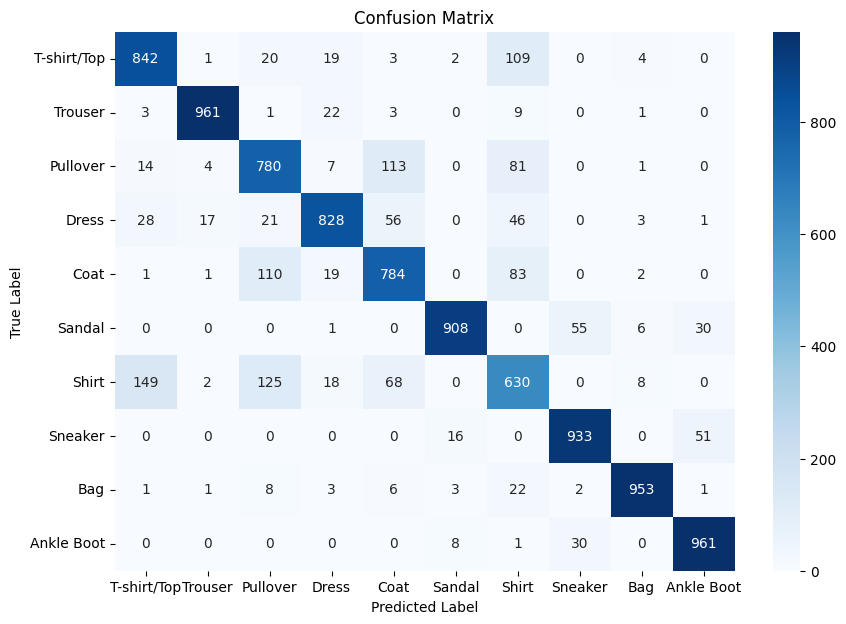

None


In [7]:
NN = neural_network(layers = [784,128,128,64,64,32,32,128,10],dataset = "fashion_mnist", learning_rate = 1e-3 ,weightDecay = 0.005, batch_size = 16,
                    epochs = 10, optimiser = 'adam', activationFunc = "sigmoid", beta = 0.1, beta_RMS = 0.9,isWandb = False)
print(NN.confusionMatrix())

epoch 1/16
 accuracy = 81.29074074074074, Loss = [0.53441374], Validation_accuracy =  80.6, Validation_loss =  [0.60012227]
epoch 2/16
 accuracy = 83.00925925925925, Loss = [0.48319085], Validation_accuracy =  81.88333333333334, Validation_loss =  [0.56252654]
epoch 3/16
 accuracy = 84.63148148148149, Loss = [0.43190298], Validation_accuracy =  83.45, Validation_loss =  [0.52121589]
epoch 4/16
 accuracy = 85.51296296296296, Loss = [0.41728241], Validation_accuracy =  84.46666666666667, Validation_loss =  [0.50633684]
epoch 5/16
 accuracy = 86.60555555555555, Loss = [0.37652776], Validation_accuracy =  85.18333333333334, Validation_loss =  [0.4842577]
epoch 6/16
 accuracy = 87.00925925925925, Loss = [0.35935727], Validation_accuracy =  85.31666666666666, Validation_loss =  [0.46281879]
epoch 7/16
 accuracy = 86.73703703703704, Loss = [0.36542328], Validation_accuracy =  84.41666666666667, Validation_loss =  [0.49281901]
epoch 8/16
 accuracy = 88.35555555555555, Loss = [0.3211907], Valid

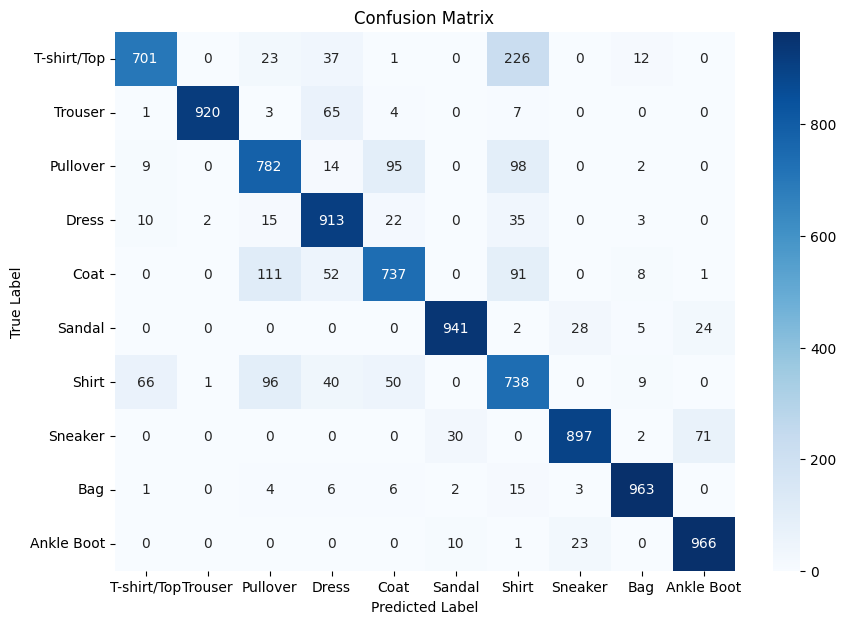

None


In [9]:
NN = neural_network(layers = [784,128,128,64,64,32,32,128,10],dataset = "fashion_mnist", learning_rate = 1e-3 ,weightDecay = 0.005, batch_size = 16,
                    epochs = 16, optimiser = 'adam', activationFunc = "sigmoid", beta = 0.1, beta_RMS = 0.9,isWandb = False)
print(NN.confusionMatrix())

epoch 1/25
 accuracy = 81.3962962962963, Loss = [0.52347894], Validation_accuracy =  80.83333333333333, Validation_loss =  [0.60667915]
epoch 2/25
 accuracy = 82.53148148148148, Loss = [0.48601568], Validation_accuracy =  81.31666666666666, Validation_loss =  [0.57792126]
epoch 3/25
 accuracy = 84.53333333333333, Loss = [0.42940684], Validation_accuracy =  83.23333333333333, Validation_loss =  [0.52704361]
epoch 4/25
 accuracy = 85.12222222222222, Loss = [0.41816784], Validation_accuracy =  83.66666666666667, Validation_loss =  [0.52015263]
epoch 5/25
 accuracy = 85.82222222222222, Loss = [0.3949125], Validation_accuracy =  84.13333333333334, Validation_loss =  [0.50906924]
epoch 6/25
 accuracy = 86.22222222222223, Loss = [0.37163416], Validation_accuracy =  84.4, Validation_loss =  [0.48681605]
epoch 7/25
 accuracy = 87.49074074074075, Loss = [0.34398008], Validation_accuracy =  84.98333333333333, Validation_loss =  [0.47183857]
epoch 8/25
 accuracy = 87.57777777777778, Loss = [0.3444

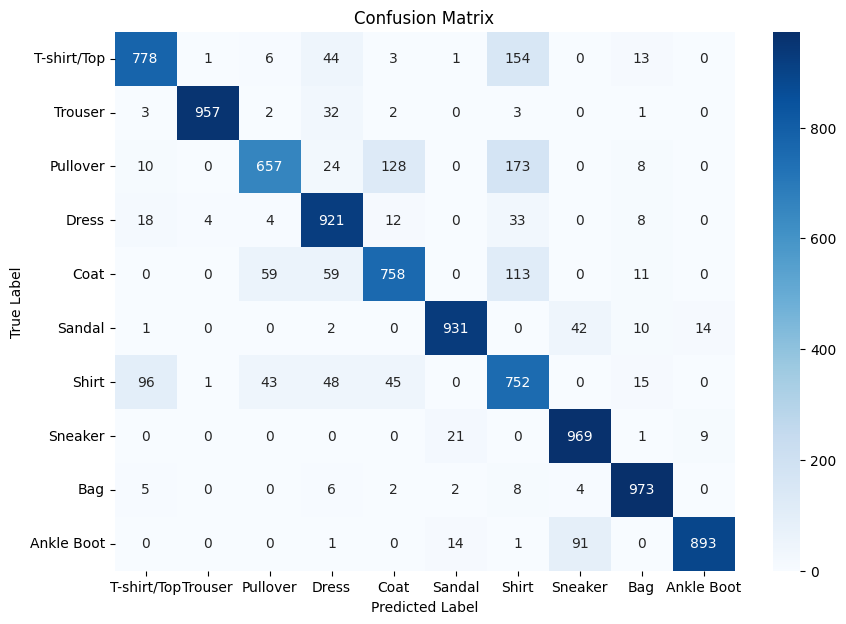

None


In [10]:
NN = neural_network(layers = [784,128,128,64,64,32,32,128,10],dataset = "fashion_mnist", learning_rate = 1e-3 ,weightDecay = 0.005, batch_size = 16,
                    epochs = 25, optimiser = 'adam', activationFunc = "sigmoid", beta = 0.1, beta_RMS = 0.9,isWandb = False)
print(NN.confusionMatrix())

In [ ]:
NN = neural_network(layers = [784,128,128,64,64,32,32,128,10],dataset = "mnist", learning_rate = 1e-3 ,weightDecay = 0.005, batch_size = 16,
                    epochs = 15, optimiser = 'adam', activationFunc = "sigmoid", beta = 0.1, beta_RMS = 0.9,isWandb = False)
print(NN.confusionMatrix())

In [ ]:
NN = neural_network(layers = [784,128,64,32,64,128,10],dataset = "fashion_mnist", learning_rate = 1e-3 ,weightDecay = 0.0005, batch_size = 64,
                    epochs = 10, optimiser = 'tanh', activationFunc = 'rmsprop', beta = 0.1, beta_RMS = 0.9,isWandb = False)
print(NN.confusionMatrix())


In [ ]:
# Import the W&B Python Library and log into W&B
import wandb


def main():
    wandb.init(project = "DA6401_ASSIGNMENT_1_newdata" , entity="devyadav11")
    config = wandb.config
    run_name = f"{config.optimiser}_{config.activationFunc}_{config.layers}_{config.batch_size}_{config.epochs}_{config.learning_rate}"

    # Set the run name
    wandb.run.name = run_name
    wandb.run.save()

    # Define and train the model as before
    model = neural_network(layers = config.layers, dataset = "fashion_mnist", learning_rate = config.learning_rate, weightDecay = config.weightDecay, batch_size = config.batch_size, epochs = config.epochs, optimiser = config.optimiser,
                           activationFunc = config.activationFunc, beta = 0.1, beta_RMS = 0.9, isWandb = True)
    model.optimseWeights()
    #wandb.finish()

sweep_config = {
    'method': 'bayes',
    'name' : 'sweep cross entropy',
    'metric': {
      'name': 'v_accuracy',
      'goal': 'maximize'
    },
    'parameters': {
        'epochs': {
            'values': [5,10]
        },
        'layers': {
          'values': [[784,32,32,32,10],[784,32,32,32,32,10],[784,32,32,32,32,32,10],[784,64,64,64,10],[784,64,64,64,64,10],[784,64,64,64,64,64,10],[784,128,128,128,128,10],
          [784,128,128,128,10],[784,128,128,128,128,128,10]]
        },
        'weightDecay': {
            'values':[0, 0.0005, 0.5]
        },
        'batch_size': {
            'values': [16, 32, 64]
        },
        'activationFunc': {
            'values': ['sigmoid','relu','tanh']
        },
        'optimiser': {
            'values': ['sgd', 'momentum', 'nestrov', 'rmsprop', 'adam']
        },

        'learning_rate': {
            'values':[1e-2,1e-3,1e-4]
        },
    }
}


sweep_id = wandb.sweep(sweep=sweep_config,project='DA6401_ASSIGNMENT_1_newdata')
wandb.agent(sweep_id, function = main , count = 100)

wandb.finish()


In [ ]:
# Import the W&B Python Library and log into W&B
import wandb


def main():
    wandb.init(project = "DA6401_ASSIGNMENT_1_final run" , entity="devyadav11")
    config = wandb.config
    run_name = f"{config.optimiser}_{config.activationFunc}_{config.layers}_{config.batch_size}_{config.epochs}_{config.learning_rate}"

    # Set the run name
    wandb.run.name = run_name
    wandb.run.save()

    # Define and train the model as before
    model = neural_network(layers = config.layers, learning_rate = config.learning_rate, weightDecay = config.weightDecay, batch_size = config.batch_size, epochs = config.epochs, optimiser = config.optimiser,
                           activationFunc = config.activationFunc, beta = 0.1, beta_RMS = 0.9, isWandb = True)
    model.optimseWeights()
    #wandb.finish()

sweep_config = {
    'method': 'bayes',
    'name' : 'sweep cross entropy',
    'metric': {
      'name': 'v_accuracy',
      'goal': 'maximize'
    },
    'parameters': {
        'epochs': {
            'values': [5,10]
        },
        'layers': {
          'values': [[784,32,32,32,10],[784,32,64,128,200,10],[784,128,64,32,64,128,10],[784,64,128,64,10],[784,30,60,90,120,10],[784,64,128,64,32,64,10],[784,128,256,128,10],
          [784,128,64,32,128,10],[784,128,128,128,128,128,10],[784,128,128,64,64,32,32,128,10]]
        },
        'weightDecay': {
            'values':[0, 0.0005, 0.5]
        },
        'batch_size': {
            'values': [16, 32, 64]
        },
        'activationFunc': {
            'values': ['sigmoid','relu','tanh']
        },
        'optimiser': {
            'values': ['sgd', 'momentum', 'nestrov', 'rmsprop', 'adam']
        },

        'learning_rate': {
            'values':[1e-2,1e-3,1e-4]
        },
    }
}


sweep_id = wandb.sweep(sweep=sweep_config,project='DA6401_ASSIGNMENT_1_newdata')
wandb.agent(sweep_id, function = main , count = 100)

wandb.finish()


In [3]:
# for printing the confusion matrix
import wandb

# Define the sweep configuration
sweep_config = {
    'method': 'bayes',
    'name' : 'confusion matrix',
    'metric': {
      'name': 'accuracy',
      'goal': 'maximize'
    },
    'parameters': {
        'batchSize': {
            'values': [64]
        },

    }
}
def main():
    # Initialize a wandb run
    wandb.init()
    # Access sweep parameters via wandb.config
    config = wandb.config

    # Define and train the model using parameters from config
    model = neural_network(layers = [784,128,128,64,64,32,32,128,10],dataset = "fashion_mnist", learning_rate = 1e-3 ,weightDecay = 0.005, batch_size = 16,
                    epochs = 16, optimiser = 'adam', activationFunc = "sigmoid", beta = 0.1, beta_RMS = 0.9,isWandb = True)


    model.confusionMatrix()

    wandb.finish()

# Create the sweep
sweep_id = wandb.sweep(sweep=sweep_config, project='DA6401_ASSIGNMENT_1_newdata')

# Start the sweep agent
wandb.agent(sweep_id, main, count=1)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Create sweep with ID: nt7wurgl
Sweep URL: https://wandb.ai/devyadav11/DA6401_ASSIGNMENT_1_newdata/sweeps/nt7wurgl


wandb: Agent Starting Run: vskbetok with config:
wandb: 	batchSize: 64
wandb: Currently logged in as: ee23m074 (devyadav11) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
epoch 1/16
 accuracy = 80.41296296296296, Loss = [0.58015736], Validation_accuracy =  79.13333333333334, Validation_loss =  [0.66280749]
epoch 2/16
 accuracy = 83.82777777777778, Loss = [0.45660061], Validation_accuracy =  82.65, Validation_loss =  [0.54024258]
epoch 3/16
 accuracy = 84.47407407407407, Loss = [0.43929275], Validation_accuracy =  82.7, Validation_loss =  [0.53970163]
epoch 4/16
 accuracy = 84.46851851851852, Loss = [0.42583625], Validation_accuracy =  82.58333333333333, Validation_loss =  [0.5347971]
epoch 5/16
 accuracy = 86.93703703703704, Loss = [0.37593994], Validation_accuracy =  84.75, Validation_loss =  [0.48665845]
epoch 6/16
 accuracy = 87.86296296296297, Loss = [0.34257352], Validation_accuracy =  85.43333333333334, Validation_loss =  [0.46355335]
epoch 7/16
 accuracy = 86.85

accuracy,▁▃▄▄▅▆▅▆▆▇▇▇▇▇██
epoch,▁▁▂▂▃▃▄▄▅▅▆▆▇▇██
loss,█▅▅▅▃▃▃▃▃▂▂▂▂▁▁▁
v_accuracy,▁▄▄▄▆▆▆▆▆▇▇▇▇▇██
v_loss,█▄▄▄▂▂▃▂▂▁▁▂▂▁▁▁
accuracy,90.69074
epoch,15
loss,0.2632
v_accuracy,86.71667
v_loss,0.4468
